In [40]:
from qiskit.quantum_info import Statevector, Operator
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import math
import matplotlib.pyplot as pl
import random

In [65]:
n = 8      #no. of qubits
N = 2**n   #dimension of matrix
t = 4      #no. of target states
length = list(range(n))
noi = math.floor(math.sqrt(N/t) * np.pi / 4)   #No of iterations
print("noi = ", noi)

#to set target states
target = np.zeros(t)
count = 0
flag = 0
i = 0
while(True):
    #to generate a random integer for target position
    a = random.randint(0,N-1)
    
    #checking if that number has already been chosen previously as target state
    for j in range(count):
        if(target[j] == a):
            flag = 1  #value is present in the target array
            
    #to store new value in target array
    if(flag == 0):
        #to store in count position of target array
        target[count] = a
        #updating count (position) value
        count += 1
        #checking for further iteration of i loop
        if(count == t):
            break
print("target = ",target)

phi = [a*np.pi/180 for a in range(45,181,45)]
print("phi = ",phi)

phi_m = [a*180/np.pi for a in phi]
print("phi_m = ",phi_m)
print("len(phi) = ",len(phi))

e_iphi = [complex(np.cos(a),np.sin(a)) for a in phi]
print("e_iphi = ",e_iphi)

theta    = [np.pi/4]
e_itheta = [complex(np.cos(a),np.sin(a)) for a in theta]
theta_m  = [a*180/np.pi for a in theta]
print("theta_m = ",theta_m)
print("e_itheta = ",e_itheta)

#array to store coherence values after each suboperation in every grover's iteration
data = np.zeros((len(phi),noi * 4))   #to store coherence values
x_axis = list(range(noi * 4))        #to store iteration number
#print(data)

noi =  6
target =  [151. 150. 229. 244.]
phi =  [0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793]
phi_m =  [45.0, 90.0, 135.0, 180.0]
len(phi) =  4
e_iphi =  [(0.7071067811865476+0.7071067811865476j), (6.123233995736766e-17+1j), (-0.7071067811865475+0.7071067811865476j), (-1+1.2246467991473532e-16j)]
theta_m =  [45.0]
e_itheta =  [(0.7071067811865476+0.7071067811865476j)]


In [68]:
def iteration(i,a):
    qc.barrier()
    count = i*4
    qc.append(O_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied O operator to |ψ2⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ2⟩ = ",coherence)
    data[a][count] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)
    data[a][count+1] = coherence

    qc.append(P_operator,length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied P operator to |ψ4⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ4⟩ = ",coherence)
    data[a][count+2] = coherence

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ5⟩", state.draw('latex'))
    density_operator = state.to_operator()
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ5⟩ = ",coherence)
    data[a][count+3] = coherence

for a in range(len(phi)):
    print("======================================== FOR ϕ = ", phi[a]*180/np.pi,"========================================")
    qc = QuantumCircuit(n)
    backend = Aer.get_backend('statevector_simulator')
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("initialised |ψ0⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ0⟩ = ",coherence)

    qc.h(length)
    result = execute(qc, backend).result()
    state = result.get_statevector()
    display("applied Hadamard to all |ψ1⟩", state.draw('latex'))
    density_operator = state.to_operator()
    #print(density_operator.data)
    coherence = 0
    for i in range(N):
        for j in range(N):
            if(i != j):
                coherence += abs(density_operator.data[i,j])
    print("coherence of |ψ1⟩ = ",coherence)

    #defining generalised O Operator
    count = 0
    choice = a
    O_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):   #off diagonal elements
                O_operator.data[i][j] = 0
            else:    #diagonal elements
                flag = 0
                for k in range(t):
                    if(i == target[k]):
                        O_operator.data[i][j] = x[choice]
                        count += 1
                        flag = 1
                        break
                if(flag == 0):
                    O_operator.data[i][j] = 1            

    #defining generalised P Operator
    P_operator = Operator(np.zeros((N,N)))
    for i in range(N):
        for j in range(N):
            if(i != j):    #off-diagonal elements
                P_operator.data[i][j] = 0
            else:
                if(i==0 & j==0):   #for 1st element only
                    P_operator.data[i][j] = e_iphi[choice]
                else:
                    P_operator.data[i][j] = -1

    #sending out for x iterations of grover's operator
    for i in range(noi):
        print("--------",(i+1)," ITERATION OF GROVER'S ITERATION--------")
        iteration(i,a)

======================================== FOR ϕ =  45.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.503906250000002


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.503906250000002


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  242.32976142717348
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  242.32976142717348


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  37.565856143016674


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  37.565856143016674


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  218.62255959772784
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  218.62255959772784


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  53.477907818254245


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  53.477907818254245


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  208.8374725824187
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  208.8374725824187


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  51.47724097038198


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  51.47724097038198


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  223.0946089683672
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  223.0946089683672


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  32.90427367539692


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  32.90427367539692


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  246.63762887425654
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  246.63762887425654


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  10.364901044879232


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  10.364901044879232


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.4006308980672
======================================== FOR ϕ =  90.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.308773503804188


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.308773503804188


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  248.0595728697178
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  248.0595728697178


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  28.88254797753694


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  28.88254797753694


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.0093754370867
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  244.0093754370867


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  24.03941541987943


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  24.03941541987943


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  252.37075870692826
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  252.37075870692826


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  6.3849584617397745


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  6.3849584617397745


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.91152044766727
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.91152044766727


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  4.713874313307356


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  4.713874313307356


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.25457684825568
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.25457684825568


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  22.325370458497254


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  22.325370458497254


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  244.51314779784312
======================================== FOR ϕ =  135.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  13.733829550674622


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  13.733829550674622


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.23921043662503
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.23921043662503


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  18.21322570940203


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  18.21322570940203


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.58247560459228
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.58247560459228


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.9203668772636053


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.9203668772636053


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.76316838222564
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  254.76316838222564


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  7.704095797514719


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  7.704095797514719


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.98886008432405
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.98886008432405


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  19.462618919702354


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  19.462618919702354


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  253.68632542501672
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  253.68632542501672


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  9.761733149925544


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  9.761733149925544


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  254.8621500396657
======================================== FOR ϕ =  180.0 ========================================


'initialised |ψ0⟩'

<IPython.core.display.Latex object>

coherence of |ψ0⟩ =  0.0


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  255.00000000000003
-------- 1  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  12.809819314304601


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  12.809819314304601


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 2  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  8.509342956923506


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  8.509342956923506


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 3  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.543617510644895


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.543617510644895


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 4  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  14.503906250000016


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  14.503906250000016


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 5  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  3.543617510644901


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  3.543617510644901


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003
-------- 6  ITERATION OF GROVER'S ITERATION--------


'applied O operator to |ψ2⟩'

<IPython.core.display.Latex object>

coherence of |ψ2⟩ =  255.00000000000003


'applied Hadamard to all |ψ1⟩'

<IPython.core.display.Latex object>

coherence of |ψ1⟩ =  8.509342956923541


'applied P operator to |ψ4⟩'

<IPython.core.display.Latex object>

coherence of |ψ4⟩ =  8.509342956923541


'applied Hadamard to all |ψ5⟩'

<IPython.core.display.Latex object>

coherence of |ψ5⟩ =  255.00000000000003


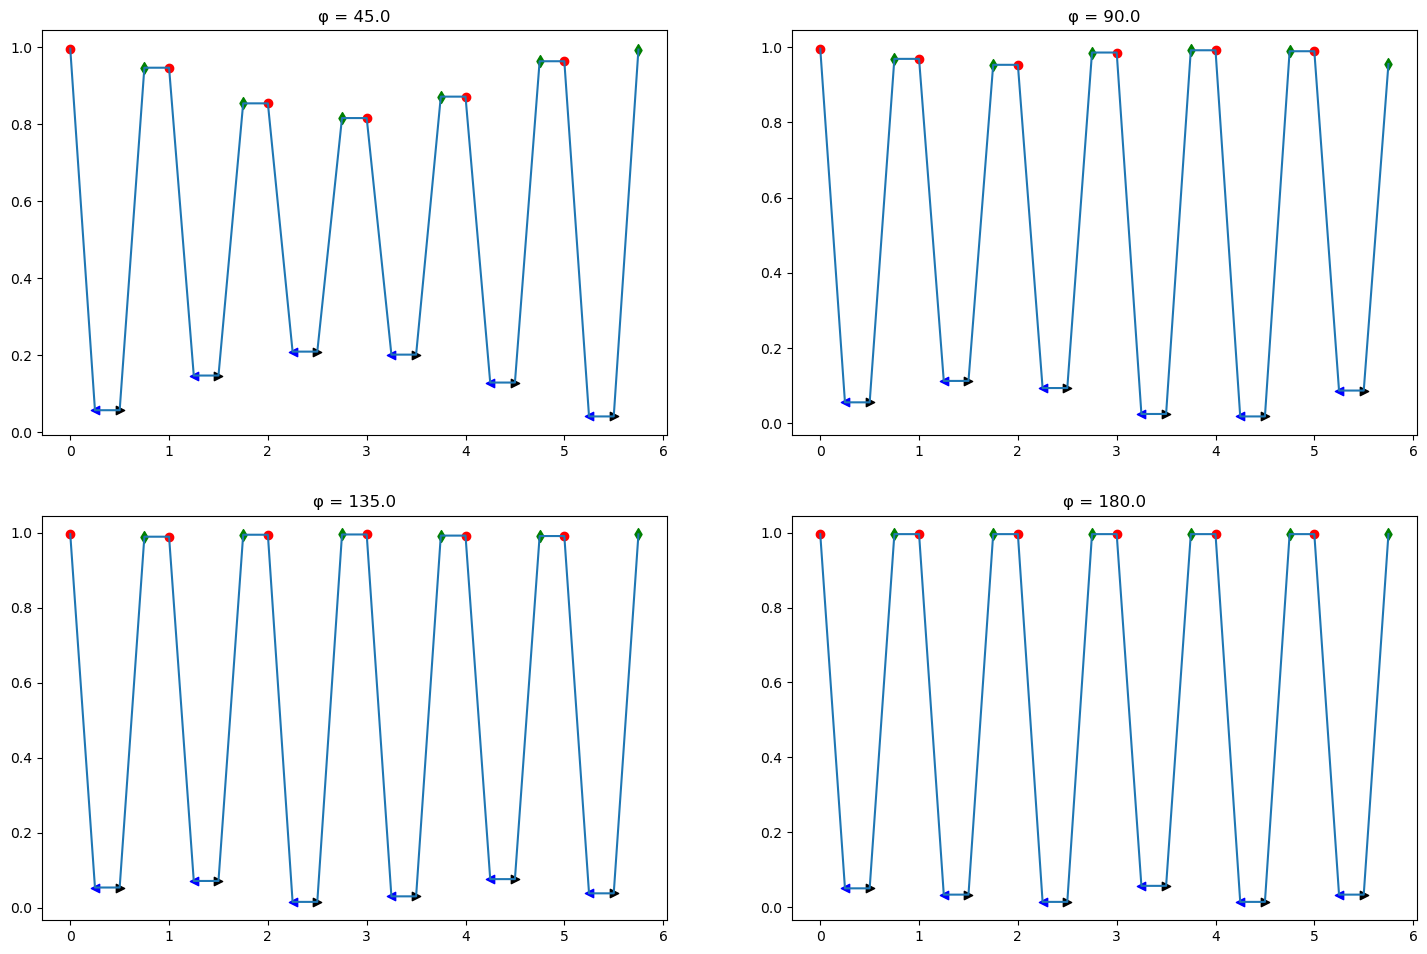

In [69]:
data_N = [a/N for a in data]
xa     = [a/4 for a in x_axis]

a = len(phi)//2
b = len(phi)//a
fig, axs = pl.subplots(a,b, figsize=(10,10))
count = 0
for i in range(a):
    for j in range(b):
        axs[i,j].scatter(xa[::4], data_N[count][::4], color='red', label='O')
        axs[i,j].scatter(xa[1::4], data_N[count][1::4], color='blue', marker='<', label='H')
        axs[i,j].scatter(xa[2::4], data_N[count][2::4], color='black', marker='>', label='P')
        axs[i,j].scatter(xa[3::4], data_N[count][3::4], color='green', marker='d', label='H')
        axs[i,j].plot(xa, data_N[count])
        axs[i,j].set_title("φ = " + str(phi[count]*180/np.pi))
        count += 1
        pl.subplots_adjust(top=1, right=1.5)
pl.show()

In [47]:
count = 0
choice = 0
O_operator = Operator(np.zeros((N,N)))
for i in range(N):
    for j in range(N):
        if(i != j):   #off diagonal elements
            O_operator.data[i][j] = 0
        else:    #diagonal elements
            flag = 0
            for k in range(t):
                if(i == target[k]):
                    O_operator.data[i][j] = x[choice]
                    count += 1
                    flag = 1
                    break
            if(flag == 0):
                O_operator.data[i][j] = 1  
print("O_operator = ",O_operator)

#defining P Operator
P_operator = Operator(np.zeros((N,N)))
for i in range(N):
    for j in range(N):
        if(i != j):    #off-diagonal elements
            P_operator.data[i][j] = 0
        else:
            if(i==0 & j==0):   #for 1st element only
                P_operator.data[i][j] = x[choice]
            else:
                P_operator.data[i][j] = -1
print("P_operator = ",P_operator)

O_operator =  Operator([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  1.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j, -1.+1.2246468e-16j,
            0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            1.+0.0000000e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))
P_operator =  Operator([[-1.+1.2246468e-16j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j, -1.+0.0000000e+00j,  0.+0.0000000e+00j,
            0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j, -1.+0.0000000e+00j,
            0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
           -1.+0.0000000e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))
